In [1]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def makeSpiral(Max):
    N = 1
    while(N**2 < Max):
        N += 1
    dirs = [(0, 1), (-1, 0), (0, -1), (1, 0)]

    spiral = np.zeros((N, N), dtype = int)
    turning_points = np.zeros((N, N), dtype = int)

    for i in range(N):
        for j in range(N):
            turning_points[i, j] = -1

    if N%2 == 1:
        coordx = int((N-1)/2)
        coordy = int((N-1)/2)
        
    else:
        coordx = int(N/2)
        coordy = int(N/2)-1
    
    now = np.array([coordx, coordy])
    turning_points[tuple(now)] = 3
    dirs_arg = 0
    N_now = 1
    max_arrows = 1
    count_arrows = 0
    reach_max = 0

    for i in range(1, Max+1):
        spiral[tuple(now)] = i

          
        
        if count_arrows == max_arrows:
            turning_points[tuple(now)] = dirs_arg 
            dirs_arg = (dirs_arg + 1)%4
            reach_max += 1
            count_arrows = 0
           
        
        if reach_max == 2:
            max_arrows += 1
            reach_max = 0


        now += dirs[dirs_arg]
        count_arrows += 1

    
    return spiral, turning_points

        


makeSpiral(200)


(array([[197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185,
         184, 183],
        [198, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134,
         133, 182],
        [199, 146, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,
         132, 181],
        [200, 147, 102,  65,  64,  63,  62,  61,  60,  59,  58,  57,  90,
         131, 180],
        [  0, 148, 103,  66,  37,  36,  35,  34,  33,  32,  31,  56,  89,
         130, 179],
        [  0, 149, 104,  67,  38,  17,  16,  15,  14,  13,  30,  55,  88,
         129, 178],
        [  0, 150, 105,  68,  39,  18,   5,   4,   3,  12,  29,  54,  87,
         128, 177],
        [  0, 151, 106,  69,  40,  19,   6,   1,   2,  11,  28,  53,  86,
         127, 176],
        [  0, 152, 107,  70,  41,  20,   7,   8,   9,  10,  27,  52,  85,
         126, 175],
        [  0, 153, 108,  71,  42,  21,  22,  23,  24,  25,  26,  51,  84,
         125, 174],
        [  0, 154, 109,  72,  43,  44,  45,  46,  47,  48,  

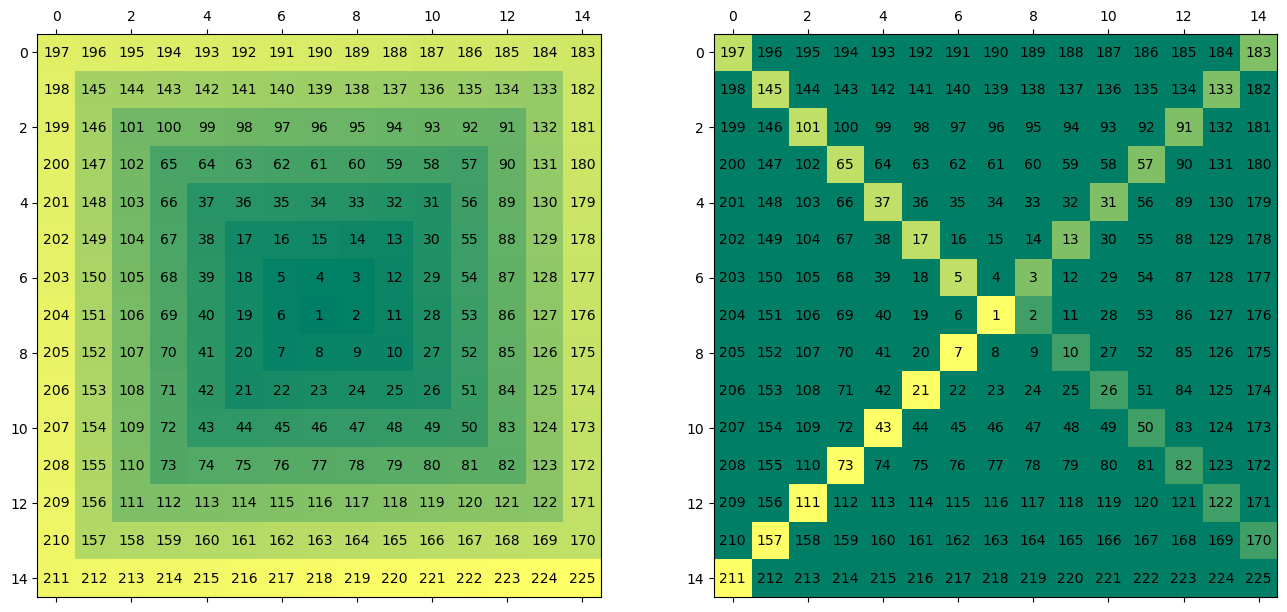

In [3]:
spiral, turning_points = makeSpiral(225)

N = len(spiral)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.matshow(spiral, cmap = 'summer')
for i in range(N):
   for j in range(N):
      c = spiral[j, i]
      ax1.text(i, j, str(c), va='center', ha='center', color = 'black')


ax2.matshow(turning_points, cmap = 'summer')

for i in range(N):
   for j in range(N):
      c = spiral[j, i]
      ax2.text(i, j, str(c), va='center', ha='center')
#hm = sns.heatmap(data=spiral,
#                annot=True)
   
# displaying the plotted heatmap
plt.savefig(f"spiral{N}.png")
plt.show()

In [4]:
def strategy(n):
    k = 0
    while(4*k**2 + 2*k + 1 < n):
        k += 1
            
    k1 = 4*(k-1)**2 + 2*(k-1) + 1
    k2 = 4*(k-1)**2 + 4*(k-1) + 2
    k3 = 4*(k-1)**2 + 6*(k-1) + 3
    k4 = 4*(k-1)**2  + 8*(k-1) + 5
    k5 = 4*k**2 + 2*k + 1


    if n == k1 or n == k5:
        print("Turning opint, bottom left corner")
    elif n == k2:
        print("Turning opint, bottom left corner")
    elif n == k3:
        print("Turning opint, top right corner")
    elif n == k4:
        print("Turning opint, top left corner")
    elif k1 < n < k2:
        print("Bottom side")
    elif k2 < n < k3:
        print("Right side")
    elif k3 < n < k4:
        print("Top side")
    elif k4 < n < k5:
        print("Left side")         

strategy(500) 

Left side


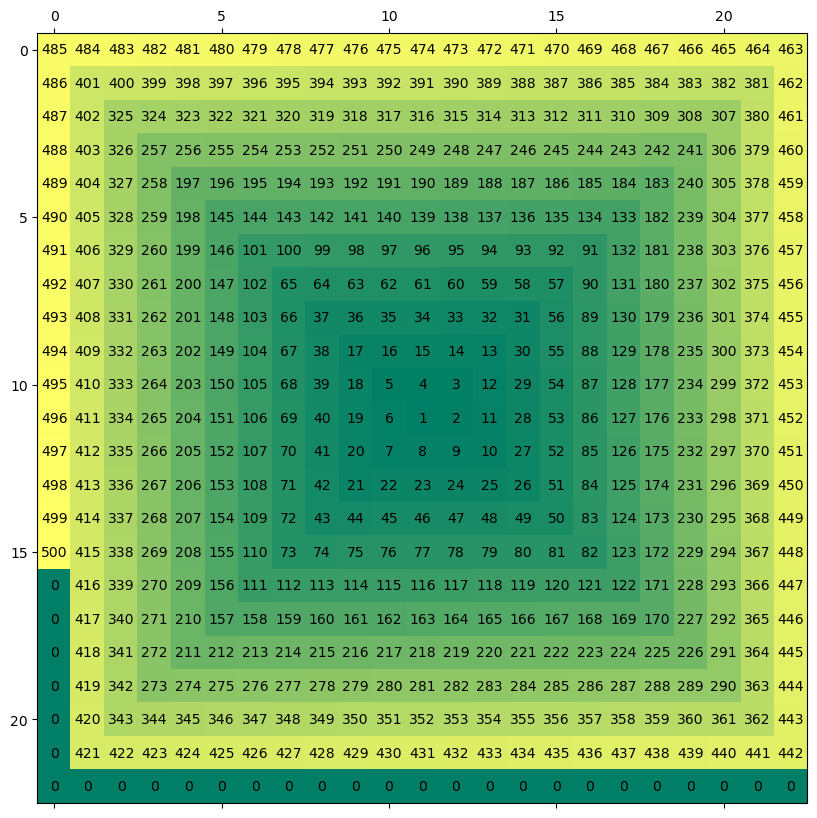

In [5]:
spiral, turning_points = makeSpiral(500)

N = len(spiral)
fig, ax = plt.subplots(figsize=(20, 10))

ax.matshow(spiral, cmap = 'summer')
for i in range(N):
   for j in range(N):
      c = spiral[j, i]
      ax.text(i, j, str(c), va='center', ha='center', color = 'black')

In [8]:
def strategy_color(array):
    properties = np.zeros_like(array)
    N = len(array)

    for i in range(N):
        for j in range(N):
            k = 0
            n = array[i, j]
            while 4*k**2 + 2*k + 1 < n:
                k += 1
            
            k1 = 4*(k-1)**2 + 2*(k-1) + 1
            k2 = 4*(k-1)**2 + 4*(k-1) + 2
            k3 = 4*(k-1)**2 + 6*(k-1) + 3
            k4 = 4*(k-1)**2  + 8*(k-1) + 5
            k5 = 4*k**2 + 2*k + 1

            if array[i, j] == k1 or array[i, j] == k5:
                properties[i, j] = 2
            elif array[i, j] == k2:
                properties[i, j] = 4
            elif array[i, j] == k3:
                properties[i, j] = 6
            elif array[i, j] == k4:
                properties[i, j] = 8
            elif k1 < array[i, j] < k2:
                properties[i, j] = -2
            elif k2 < array[i, j] < k3:
                properties[i, j] = -4
            elif k3 < array[i, j] < k4:
                properties[i, j] = -6
            elif k4 < array[i, j] < k5:
                properties[i, j] = -8
            
    
    return properties

strategy(spiral)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
spiral, turning_points = makeSpiral(400)
properties = strategy_color(spiral)
N = len(spiral)
fig, ax = plt.subplots( figsize=(16, 8))




ax.matshow(properties, cmap = 'summer')

for i in range(N):
   for j in range(N):
      c = spiral[j, i]
      ax.text(i, j, str(c), va='center', ha='center')
#hm = sns.heatmap(data=spiral,
#                annot=True)
   
# displaying the plotted heatmap
plt.savefig(f"Properties.png")
plt.show()